# Trip Advisor Model Testing Notebook

- This notebook is used for testing the TA (trip advisor) trained model on a variety of other datasets, beginning with a test of the TA data itself using data not included in the original training and validation of the model


### RUN THIS FIRST before anything else

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import string
import warnings
import pickle
import os

from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

os.chdir('/home/ubuntu/Notebooks/capstone2/src')
from app_module import _lower_rm_punct, _my_padding, transform
# from lists import stop_words,noise
from functions import sample_mean
from plots import model_plots

%matplotlib inline
punctuation = set(string.punctuation)

file = 'word_dict_ta_new.pkl'
os.chdir('/home/ubuntu/Notebooks/capstone2/data')
with open(file, 'rb') as f:
    word_dict = pickle.load(f)
    
os.chdir('/home/ubuntu/Notebooks/data')
model = load_model('first_model_ta.h5')

# Ta Test

### Train DATA

In [63]:
# set path for trip advisor data
os.chdir('/home/ubuntu/Notebooks/data')
df = pd.read_pickle('ta/ta_test.pickle')#.replace(1.0,2.0).replace(0.0,2.0)

idx_2 = df[df['ratings_overall'] == 2].index
idx_3 = df[df['ratings_overall'] == 3].index
idx_4 = df[df['ratings_overall'] == 4].index
idx_5 = df[df['ratings_overall'] == 5].index

np.random.seed(10)
sample_idx_2 = np.random.choice(idx_2,replace=False,size=2800)
sample_idx_3 = np.random.choice(idx_3,replace=False,size=2800)
sample_idx_4 = np.random.choice(idx_4,replace=False,size=2800)
sample_idx_5 = np.random.choice(idx_5,replace=False,size=2800)

df = pd.concat([ta_data.loc[sample_idx_2],
           df.loc[sample_idx_3],
           df.loc[sample_idx_4],
           df.loc[sample_idx_5]],axis=0).sample(frac=1)

df.columns = ['text','stars']

X = df['text']
y = df['stars'].replace(1,2)
del df
X = np.vstack([transform(doc,161,word_dict) for doc in X])

### Accuracy Report

In [65]:
y_predictions = model.predict_classes(X)
y_pred = y_predictions+2
y_diff = (y_pred) - y.values
print('% breakdown accuracy incl. 1 error: ',np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0])
print('% total accuracy incl. 1 error: ',np.sum(np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0]))

% breakdown accuracy incl. 1 error:  [0.14375    0.58705357 0.226875  ]
% total accuracy incl. 1 error:  0.9576785714285714


In [69]:
print(classification_report(y.values,y_pred))

              precision    recall  f1-score   support

           2       0.74      0.57      0.64      2800
           3       0.49      0.49      0.49      2800
           4       0.48      0.60      0.53      2800
           5       0.70      0.70      0.70      2800

   micro avg       0.59      0.59      0.59     11200
   macro avg       0.60      0.59      0.59     11200
weighted avg       0.60      0.59      0.59     11200



# Hotel Test

In [70]:
df = pd.read_pickle('/home/ubuntu/Notebooks/capstone2/data/hotels.pickle')
df = df[df['language'] == 'en']
df = df[['reviews.text','reviews.rating']].drop_duplicates().replace(1.0,2.0).replace(0.0,2.0)
df.columns = ['text','stars']

idx_2 = df[df['stars'] == 2].index
idx_3 = df[df['stars'] == 3].index
idx_4 = df[df['stars'] == 4].index
idx_5 = df[df['stars'] == 5].index

np.random.seed(10)
sample_idx_2 = np.random.choice(idx_2,replace=False,size=2245)
sample_idx_3 = np.random.choice(idx_3,replace=False,size=2245)
sample_idx_4 = np.random.choice(idx_4,replace=False,size=2245)
sample_idx_5 = np.random.choice(idx_5,replace=False,size=2245)

df = pd.concat([df.loc[sample_idx_2],
           df.loc[sample_idx_3],
           df.loc[sample_idx_4],
           df.loc[sample_idx_5]],axis=0)

X = df['text']
y = df['stars']
del df
print('avg: review length: ',X.apply(lambda x: len(x.split())).mean())
X = np.vstack([transform(doc,161,word_dict) for doc in X])

avg: review length:  50.196993318485525


In [71]:
y_predictions = model.predict_classes(X)
y_pred = y_predictions+2
y_diff = (y_pred) - y.values
print('% breakdown accuracy incl. 1 error: ',np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0])
print('% total accuracy incl. 1 error: ',np.sum(np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0]))
print(classification_report(y.values,y_pred))

% breakdown accuracy incl. 1 error:  [0.17639198 0.56570156 0.17505568]
% total accuracy incl. 1 error:  0.9171492204899778
              precision    recall  f1-score   support

         2.0       0.66      0.74      0.70      2245
         3.0       0.49      0.43      0.46      2245
         4.0       0.47      0.43      0.45      2245
         5.0       0.61      0.66      0.63      2245

   micro avg       0.57      0.57      0.57      8980
   macro avg       0.56      0.57      0.56      8980
weighted avg       0.56      0.57      0.56      8980



# Yelp Test

In [72]:
df = pd.read_pickle('/home/ubuntu/Notebooks/data/yelp_reviews.p')
df = df[['text','stars']].drop_duplicates().replace(1.0,2.0)


idx_2 = df[df['stars'] == 2].index
idx_3 = df[df['stars'] == 3].index
idx_4 = df[df['stars'] == 4].index
idx_5 = df[df['stars'] == 5].index

np.random.seed(10)
sample_idx_2 = np.random.choice(idx_2,replace=False,size=2245)
sample_idx_3 = np.random.choice(idx_3,replace=False,size=2245)
sample_idx_4 = np.random.choice(idx_4,replace=False,size=2245)
sample_idx_5 = np.random.choice(idx_5,replace=False,size=2245)

df = pd.concat([df.loc[sample_idx_2],
           df.loc[sample_idx_3],
           df.loc[sample_idx_4],
           df.loc[sample_idx_5]],axis=0)


X = df['text']
y = df['stars']
del df
print('avg: review length: ',X.apply(lambda x: len(x.split())).mean())
X = np.vstack([transform(doc,161,word_dict) for doc in X])

avg: review length:  115.92149220489978


In [73]:
y_predictions = model.predict_classes(X)
y_pred = y_predictions+2
y_diff = (y_pred) - y.values

In [74]:
print('% breakdown accuracy incl. 1 error: ',np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0])
print('% total accuracy incl. 1 error: ',np.sum(np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0]))
print(classification_report(y.values,y_pred))

% breakdown accuracy incl. 1 error:  [0.12193764 0.56280624 0.23730512]
% total accuracy incl. 1 error:  0.9220489977728286
              precision    recall  f1-score   support

         2.0       0.79      0.60      0.68      2245
         3.0       0.48      0.49      0.49      2245
         4.0       0.44      0.48      0.46      2245
         5.0       0.61      0.68      0.64      2245

   micro avg       0.56      0.56      0.56      8980
   macro avg       0.58      0.56      0.57      8980
weighted avg       0.58      0.56      0.57      8980



# Movie Test

In [77]:
df = pd.read_pickle('/home/ubuntu/Notebooks/data/amzn_reviews.pickle')
df = df[['reviewText','overall']].drop_duplicates().replace(1.0,2.0)
df.columns = ['text','stars']

idx_2 = df[df['stars'] == 2].index
idx_3 = df[df['stars'] == 3].index
idx_4 = df[df['stars'] == 4].index
idx_5 = df[df['stars'] == 5].index

np.random.seed(10)
sample_idx_2 = np.random.choice(idx_2,replace=False,size=2245)
sample_idx_3 = np.random.choice(idx_3,replace=False,size=2245)
sample_idx_4 = np.random.choice(idx_4,replace=False,size=2245)
sample_idx_5 = np.random.choice(idx_5,replace=False,size=2245)

df = pd.concat([df.loc[sample_idx_2],
           df.loc[sample_idx_3],
           df.loc[sample_idx_4],
           df.loc[sample_idx_5]],axis=0)

X = df['text']
y = df['stars']

del df
print('avg: review length: ',X.apply(lambda x: len(x.split())).mean())
X = np.vstack([transform(doc,161,word_dict) for doc in X])

avg: review length:  132.5476614699332


In [78]:
y_predictions = model.predict_classes(X)
y_pred = y_predictions+2
y_diff = (y_pred) - y.values
((y_predictions+2) == y.values).mean()

print('% breakdown accuracy incl. 1 error: ',np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0])
print('% total accuracy incl. 1 error: ',np.sum(np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0]))
print(classification_report(y.values,y_pred))

% breakdown accuracy incl. 1 error:  [0.15567929 0.43730512 0.19821826]
% total accuracy incl. 1 error:  0.7912026726057907
              precision    recall  f1-score   support

         2.0       0.48      0.57      0.52      2245
         3.0       0.39      0.32      0.35      2245
         4.0       0.37      0.24      0.30      2245
         5.0       0.46      0.61      0.53      2245

   micro avg       0.44      0.44      0.44      8980
   macro avg       0.43      0.44      0.42      8980
weighted avg       0.43      0.44      0.42      8980



# Amzn Electronic Products

In [78]:
df = pd.read_csv('1429_1.csv')
os.chdir('/home/ubuntu/Notebooks/data')

In [100]:
os.chdir('/home/ubuntu/Notebooks/data')
df = pd.read_csv('1429_1.csv')
df = df[['reviews.text','reviews.rating']].replace(1.0,2.0)
df.columns = ['text','stars']


idx_2 = df[df['stars'] == 2].index
idx_3 = df[df['stars'] == 3].index
idx_4 = df[df['stars'] == 4].index
idx_5 = df[df['stars'] == 5].index

np.random.seed(10)
sample_idx_2 = np.random.choice(idx_2,replace=False,size=812)
sample_idx_3 = np.random.choice(idx_3,replace=False,size=1499)
sample_idx_4 = np.random.choice(idx_4,replace=False,size=1499)
sample_idx_5 = np.random.choice(idx_5,replace=False,size=1499)

df = pd.concat([df.loc[sample_idx_2],
           df.loc[sample_idx_3],
           df.loc[sample_idx_4],
           df.loc[sample_idx_5]],axis=0)

X = df['text']
y = df['stars']

del df
print('avg: review length: ',X.apply(lambda x: len(x.split())).mean())
X = np.vstack([transform(doc,150,word_dict) for doc in X])

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


avg: review length:  35.55999246562441


In [102]:
y_predictions = model.predict_classes(X)
y_pred = y_predictions+2
y_diff = (y_pred) - y.values
((y_predictions+2) == y.values).mean()

print('% breakdown accuracy incl. 1 error: ',np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0])
print('% total accuracy incl. 1 error: ',np.sum(np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0]))
print(classification_report(y.values,y_pred))

% breakdown accuracy incl. 1 error:  [0.16198908 0.45526464 0.21774345]
% total accuracy incl. 1 error:  0.8349971746091542


# Amzn Automotive Products

In [79]:
os.chdir('/home/ubuntu/Notebooks/data')
df = pd.read_json('reviews_Automotive_5.json.gz',compression='gzip', lines=True).replace(1.0,2.0)
df = df[['reviewText','overall']]
df.columns = ['text','stars']


idx_2 = df[df['stars'] == 2].index
idx_3 = df[df['stars'] == 3].index
idx_4 = df[df['stars'] == 4].index
idx_5 = df[df['stars'] == 5].index

np.random.seed(10)
sample_idx_2 = np.random.choice(idx_2,replace=False,size=1148)
sample_idx_3 = np.random.choice(idx_3,replace=False,size=1430)
sample_idx_4 = np.random.choice(idx_4,replace=False,size=1430)
sample_idx_5 = np.random.choice(idx_5,replace=False,size=1430)

df = pd.concat([df.loc[sample_idx_2],
           df.loc[sample_idx_3],
           df.loc[sample_idx_4],
           df.loc[sample_idx_5]],axis=0)

X = df['text']
y = df['stars']

del df
print('avg: review length: ',X.apply(lambda x: len(x.split())).mean())
X = np.vstack([transform(doc,161,word_dict) for doc in X])

avg: review length:  95.64490621552041


In [80]:
y_predictions = model.predict_classes(X)
y_pred = y_predictions+2
y_diff = (y_pred) - y.values
((y_predictions+2) == y.values).mean()

print('% breakdown accuracy incl. 1 error: ',np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0])
print('% total accuracy incl. 1 error: ',np.sum(np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0]))
print(classification_report(y.values,y_pred))

% breakdown accuracy incl. 1 error:  [0.26094152 0.39279147 0.14490622]
% total accuracy incl. 1 error:  0.7986392055902906
              precision    recall  f1-score   support

         2.0       0.39      0.47      0.43      1148
         3.0       0.34      0.57      0.43      1430
         4.0       0.39      0.29      0.33      1430
         5.0       0.59      0.25      0.35      1430

   micro avg       0.39      0.39      0.39      5438
   macro avg       0.43      0.40      0.39      5438
weighted avg       0.43      0.39      0.38      5438



# Amzn Pet Supplies

In [81]:
os.chdir('/home/ubuntu/Notebooks/data')
df = pd.read_json('reviews_Pet_Supplies_5.json.gz',compression='gzip', lines=True).replace(1.0,2.0)
df = df[['reviewText','overall']]
df.columns = ['text','stars']


idx_2 = df[df['stars'] == 2].index
idx_3 = df[df['stars'] == 3].index
idx_4 = df[df['stars'] == 4].index
idx_5 = df[df['stars'] == 5].index

np.random.seed(10)
sample_idx_2 = np.random.choice(idx_2,replace=False,size=10000)
sample_idx_3 = np.random.choice(idx_3,replace=False,size=10000)
sample_idx_4 = np.random.choice(idx_4,replace=False,size=10000)
sample_idx_5 = np.random.choice(idx_5,replace=False,size=10000)

df = pd.concat([df.loc[sample_idx_2],
           df.loc[sample_idx_3],
           df.loc[sample_idx_4],
           df.loc[sample_idx_5]],axis=0)

X = df['text']
y = df['stars']

del df
print('avg: review length: ',X.apply(lambda x: len(x.split())).mean())
X = np.vstack([transform(doc,161,word_dict) for doc in X])

avg: review length:  93.7513


In [82]:
y_predictions = model.predict_classes(X)
y_pred = y_predictions+2
y_diff = (y_pred) - y.values
((y_predictions+2) == y.values).mean()

print('% breakdown accuracy incl. 1 error: ',np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0])
print('% total accuracy incl. 1 error: ',np.sum(np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0]))
print(classification_report(y.values,y_pred))

% breakdown accuracy incl. 1 error:  [0.2299 0.4124 0.1732]
% total accuracy incl. 1 error:  0.8155
              precision    recall  f1-score   support

         2.0       0.47      0.46      0.47     10000
         3.0       0.34      0.50      0.40     10000
         4.0       0.36      0.32      0.34     10000
         5.0       0.55      0.37      0.44     10000

   micro avg       0.41      0.41      0.41     40000
   macro avg       0.43      0.41      0.41     40000
weighted avg       0.43      0.41      0.41     40000



# Amzn Digital Music

In [83]:
os.chdir('/home/ubuntu/Notebooks/data')
df = pd.read_json('reviews_Digital_Music_5.json.gz',compression='gzip', lines=True).replace(1.0,2.0)
df = df[['reviewText','overall']]
df.columns = ['text','stars']


idx_2 = df[df['stars'] == 2].index
idx_3 = df[df['stars'] == 3].index
idx_4 = df[df['stars'] == 4].index
idx_5 = df[df['stars'] == 5].index

np.random.seed(10)
sample_idx_2 = np.random.choice(idx_2,replace=False,size=5801)
sample_idx_3 = np.random.choice(idx_3,replace=False,size=5801)
sample_idx_4 = np.random.choice(idx_4,replace=False,size=5801)
sample_idx_5 = np.random.choice(idx_5,replace=False,size=5801)

df = pd.concat([df.loc[sample_idx_2],
           df.loc[sample_idx_3],
           df.loc[sample_idx_4],
           df.loc[sample_idx_5]],axis=0)

X = df['text']
y = df['stars']

del df
print('avg: review length: ',X.apply(lambda x: len(x.split())).mean())
X = np.vstack([transform(doc,161,word_dict) for doc in X])

avg: review length:  191.34343216686779


In [84]:
y_predictions = model.predict_classes(X)
y_pred = y_predictions+2
y_diff = (y_pred) - y.values
((y_predictions+2) == y.values).mean()

print('% breakdown accuracy incl. 1 error: ',np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0])
print('% total accuracy incl. 1 error: ',np.sum(np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0]))
print(classification_report(y.values,y_pred))

% breakdown accuracy incl. 1 error:  [0.1828995  0.40225823 0.18996725]
% total accuracy incl. 1 error:  0.775124978451991
              precision    recall  f1-score   support

         2.0       0.44      0.51      0.48      5801
         3.0       0.35      0.45      0.39      5801
         4.0       0.36      0.20      0.26      5801
         5.0       0.45      0.45      0.45      5801

   micro avg       0.40      0.40      0.40     23204
   macro avg       0.40      0.40      0.39     23204
weighted avg       0.40      0.40      0.39     23204



In [88]:
datasets = np.asarray(['trip advisor reviews','hotels','yelp restaurants','movies',
            'kindles/tablets','automotive','pet supplies'])#,'music'])
dataset_counts = np.asarray([set for set in range(len(datasets))])
accuracy = np.asarray([.587,.566,0.563,.437,.456,.392,.412])#,.407])
error_accuracy = np.asarray([.957,.917,0.922,.791,.835,.798,.816])#,.749])

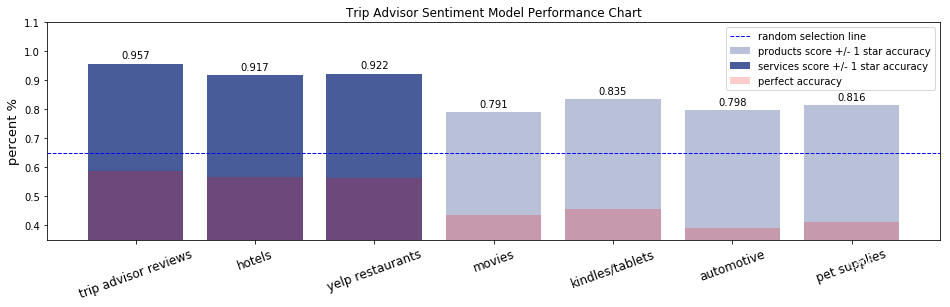

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(1,figsize=(16,4))
ax.bar(dataset_counts[3:],error_accuracy[3:],label="products score +/- 1 star accuracy",color=[(0.1, 0.2, 0.5, 0.3),
                                                       (0.1, 0.2, 0.5, 0.3),
                                                       (0.1, 0.2, 0.5, 0.3),
                                                       (0.1, 0.2, 0.5, 0.3)])

ax.bar(dataset_counts[:3],error_accuracy[:3],label="services score +/- 1 star accuracy",color=[(0.1, 0.2, 0.5),
                                                       (0.1, 0.2, 0.5),
                                                       (0.1, 0.2, 0.5)],alpha=.8)

ax.set_ylim(.35,1.1)
ax.axhline(.65,linestyle='--',linewidth=1,color='blue',label='random selection line')
ax.set_xticks(dataset_counts)
ax.set_xticklabels(datasets,rotation=20,fontsize=12)
ax.text(6.02,.27,'random_acc_line',color='white',horizontalalignment='center',fontsize=10)
# ax.text(7.04,.67,'random_err_acc_line',color='red',horizontalalignment='center',fontsize=12)
ax.set_ylabel('percent %',fontsize=13)
ax.bar(dataset_counts,accuracy,label='perfect accuracy',color='red',linestyle='--',alpha=.2)
# ax.axhline(.65,linestyle='--',color='red',linewidth=1)
ax.set_title('Trip Advisor Sentiment Model Performance Chart')
# ax.set_yticks([])
for i in dataset_counts:
    ax.text(i,error_accuracy[i]+error_accuracy[i]*.02,'{}'.format(error_accuracy[i]),horizontalalignment='center')
ax.legend(loc='upper right')
plt.show()

In [90]:
service_accuracies = accuracy[:3]
product_accuracies = accuracy[3:]

In [91]:
import scipy.stats as stats
t_score = stats.t.ppf(1-0.05, 4)

pa_mean = product_accuracies.mean()
sa_mean = service_accuracies.mean()
pa_var = product_accuracies.var()
sa_var = service_accuracies.var()
pa_sample_size = len(product_accuracies)
sa_sample_size = len(service_accuracies)
df = pa_sample_size + sa_sample_size -2

CI = stats.t.ppf(.95,5) * ((pa_var/(pa_sample_size-1))+(sa_var/(sa_sample_size-1)))**.5

In [92]:
CI

0.03209746047209532

In [ ]:
#       (Xhat1 - Xhat2) - (u1 - u2)
# t =  -----------------------------
#       Sqrt(s1^2/n1 + s2^2/n2)

In [93]:
(sa_mean-pa_mean)/((pa_var/pa_sample_size)+(sa_var/sa_sample_size))**(.5)

10.846775897400152

In [94]:
CI = (sa_mean-pa_mean) + stats.t.ppf(.95,5)*((pa_var/pa_sample_size)+(sa_var/sa_sample_size))**(.5)

In [95]:
CI

0.17519810069628414

In [96]:
accuracy[:2].mean()
accuracy[4:]

array([0.456, 0.392, 0.412])

In [97]:
CiUpper = Xa-Xv + st.norm.ppf(.975,)*((SDv**2/Nv)+(SDa**2/Na))**.5

NameError: name 'Xa' is not defined

In [98]:
print(pa_mean)
print(sa_mean)
print(pa_var)
print(sa_var)
print(pa_sample_size)
print(sa_sample_size)

0.42425
0.572
0.0005901875000000001
0.00011400000000000021
4
3


In [403]:
np.random.choice([1,2,3,10],size=10,replace=True)

array([ 1,  1,  3,  3,  2,  1,  1, 10,  2,  1])

In [99]:
def sample_mean_diff(series1,series2):
    return (np.sum(series1)/(len(series1)-1)) - (sum(series2)/(len(series2)-1))

def bootstrap(series1,series2,n):
    list_of_means = []
    for i in range(n):
        list_of_means.append(round(np.mean(np.random.choice(series1,size=len(series1),replace=True))\
                            -np.mean(np.random.choice(series2,size=len(series2),replace=True)),2))
    return list_of_means

def sample_mean(series):
    return np.sum(series) / (len(series) - 1)

sample_averages = bootstrap(service_accuracies,product_accuracies,500)

np.std(sample_averages)

0.014440207754738156

In [100]:
import seaborn as sns

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


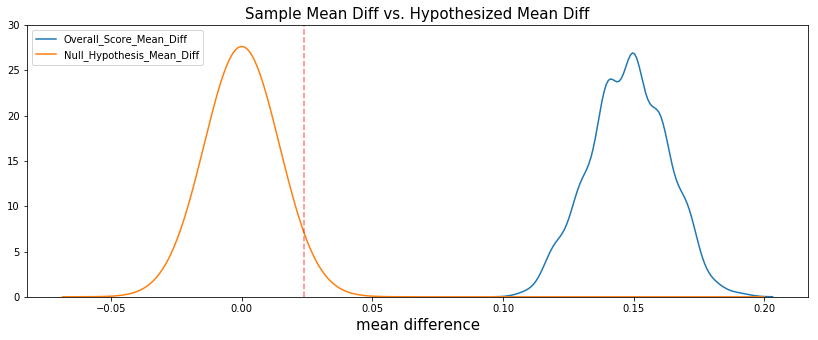

In [105]:
fig, ax = plt.subplots(1,figsize=(14,5))
normal_approx = stats.norm(0, np.std(sample_averages))
x1 = np.linspace(min(sample_averages),max(sample_averages),len(sample_averages))
# sns.distplot(sample_averages,bins=25,ax=ax,hist=False,label='Value Hotel-Airbnb Mean Diff')


# sns.distplot(value_averages,bins=25,ax=ax[1],label='Value_Score_Mean_Diff')
# sns.distplot(sample_averages,bins=25,ax=ax[1],label='Overall_Score_Mean_Diff',hist=False)
# ax[0].set_title('Value vs. Overall Airbnb Mean Score Difference')
sns.distplot(sample_averages,bins=25,ax=ax,label='Overall_Score_Mean_Diff',hist=False)
x = np.linspace(normal_approx.ppf(.000001), .2, num=500)
ax.set_title('Sample Mean Diff vs. Hypothesized Mean Diff',fontsize=15)
ax.set_xlabel('mean difference',fontsize=15)
ax.set_ylim(0,30)
ax.plot(x,normal_approx.pdf(x),label='Null_Hypothesis_Mean_Diff')
# ax.axvline(x=normal_approx.ppf(.025), color = 'red',alpha=.5,label='.95 CI',linestyle='--')
ax.axvline(x=normal_approx.ppf(.95), color = 'red',alpha=.5,linestyle='--')
ax.legend()

In [408]:
np.random.choice(service_accuracies,size=len(service_accuracies),replace=True)

array([0.559, 0.615, 0.559])

In [411]:
def bootstrap(series1,series2,n):
    list_of_means = []
    for i in range(n):
        list_of_means.append(round(sample_mean(np.random.choice(series1,size=len(series1),replace=True))\
                            -sample_mean(np.random.choice(series2,size=len(series2),replace=True)),2))
    return list_of_means

# Airbnb Check

In [112]:
df = pd.read_pickle('df_reviews.pickle')
df = df.drop_duplicates()
# df = df[['comments']]

df2 = pd.read_pickle('df_listings.pickle')
df2 = df2[['id','review_scores_rating']]
df2.columns = ['listing_id','stars']
df2 = df2.groupby('listing_id')[['stars']].min().apply(lambda x: np.round(x/20)).replace(0.0,
                                                                                                2.0).replace(1.0
                                                                                                             ,2.0)
df = df.merge(df2,how='left',on='listing_id')
df = df[['comments','stars']].sample(40000)
df.columns = ['text','stars']

# idx_2 = df[df['stars'] == 2].index
# idx_3 = df[df['stars'] == 3].index
# idx_4 = df[df['stars'] == 4].index
# idx_5 = df[df['stars'] == 5].index

# np.random.seed(10)
# sample_idx_2 = np.random.choice(idx_2,replace=False,size=847)
# sample_idx_3 = np.random.choice(idx_3,replace=False,size=4263)
# sample_idx_4 = np.random.choice(idx_4,replace=False,size=4263)
# sample_idx_5 = np.random.choice(idx_5,replace=False,size=4263)

# df = pd.concat([df.loc[sample_idx_2],
#            df.loc[sample_idx_3],
#            df.loc[sample_idx_4],
#            df.loc[sample_idx_5]],axis=0)



X = df['text']
y = df['stars']

del df
print('avg: review length: ',X.apply(lambda x: len(x.split())).mean())
X = np.vstack([transform(doc,161,word_dict) for doc in X])

avg: review length:  48.0437


In [113]:
y_predictions = model.predict_classes(X)

y_predictions = model.predict_classes(X)
y_diff = (y_predictions+2) - y.values
((y_predictions+2) == y.values).mean()

print('% breakdown accuracy incl. 1 error: ',np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0])
print('% total accuracy incl. 1 error: ',np.sum(np.unique(y_diff,return_counts=True)[1][2:5]/y_diff.shape[0]))

% breakdown accuracy incl. 1 error:  [0.14835  0.715525 0.0818  ]
% total accuracy incl. 1 error:  0.9456749999999999


In [27]:
y.value_counts().sort_values().values

array([   21,   131,  5357, 34314])

Text(0, 0.5, 'Count')

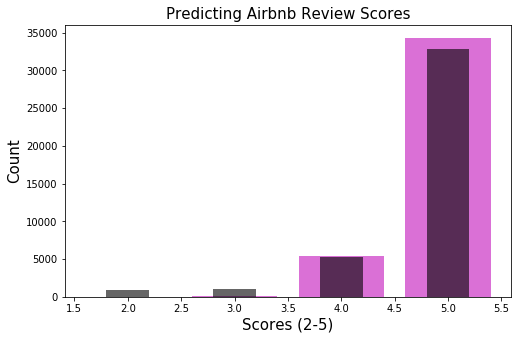

In [56]:
ybar_pred = np.unique(y_predictions,return_counts=True)[1]
xbar_pred = [2,3,4,5]
ybar_test = y.value_counts().sort_values().values
xbar_test = [2,3,4,5]

fig,ax = plt.subplots(figsize=(8,5))
ax.bar(xbar_test,ybar_test,color='orchid')
ax.bar(xbar_pred,ybar_pred,width=.4,alpha=.6,color='black')

ax.set_title('Predicting Airbnb Review Scores',fontsize=15)
ax.set_xlabel('Scores (2-5)',fontsize=15)
ax.set_ylabel('Count',fontsize=15)

#plt.bar(xbar_test,ybar_test)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.1000e+01, 0.0000e+00, 0.0000e+00, 1.3100e+02, 0.0000e+00,
        0.0000e+00, 5.3570e+03, 0.0000e+00, 0.0000e+00, 3.4314e+04]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <a list of 10 Patch objects>)

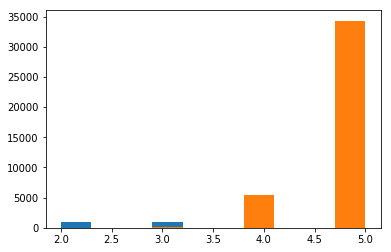

In [12]:
plt.hist(y_predictions+2)
plt.hist(y)

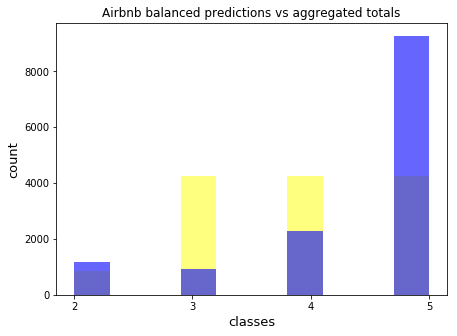

In [65]:
fig, ax = plt.subplots(1,figsize=(7,5))
# plt.hist(y)

ax.hist(y,alpha=.5,color='yellow')
ax.hist(y_predictions+2,alpha=.6,color='blue')
ax.set_xlabel('classes',fontsize=13)
ax.set_ylabel('count',fontsize=13)
ax.set_title('Airbnb balanced predictions vs aggregated totals')

ticks = [2,3,4,5]
ax.set_xticks(ticks)


In [2]:
import string

In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'